In [48]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import folium
plt.style.use('ggplot')

## Download the data

In [23]:
!curl -o Historical_Wildfires.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  2 2000k    2 49152    0     0  30047      0  0:01:08  0:00:01  0:01:07 30062
 82 2000k   82 1648k    0     0   625k      0  0:00:03  0:00:02  0:00:01  625k
100 2000k  100 2000k    0     0   552k      0  0:00:03  0:00:03 --:--:--  553k


In [24]:
df = pd.read_csv('Historical_Wildfires.csv')
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


## Dataset

**Historical Wildfires**

This wildfire dataset contains data on fire activities in Australia starting from 2005. Additional information can be found [here](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/c6-mcd14dl).

Variables

- Region: the 7 regions
- Date: in UTC and provide the data for 24 hours ahead
- Estimated_fire_area: daily sum of estimated fire area for presumed vegetation fires with a confidence > 75% for a each region in km2
- Mean_estimated_fire_brightness: daily mean (by flagged fire pixels(=count)) of estimated fire brightness for presumed vegetation fires with a confidence level > 75% in Kelvin
- Mean_estimated_fire_radiative_power: daily mean of estimated radiative power for presumed vegetation fires with a confidence level > 75% for a given region in megawatts
- Mean_confidence: daily mean of confidence for presumed vegetation fires with a confidence level > 75%
- Std_confidence: standard deviation of estimated fire radiative power in megawatts
- Var_confidence: Variance of estimated fire radiative power in megawatts
- Count: daily numbers of pixels for presumed vegetation fires with a confidence level of larger than 75% for a given region
- Replaced: Indicates with an Y whether the data has been replaced with standard quality data when they are available (usually with a 2-3 month lag). Replaced data has a slightly higher quality in terms of locations


In [25]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [26]:
df.shape

(26406, 10)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26406 entries, 0 to 26405
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               26406 non-null  object 
 1   Date                                 26406 non-null  object 
 2   Estimated_fire_area                  26406 non-null  float64
 3   Mean_estimated_fire_brightness       26406 non-null  float64
 4   Mean_estimated_fire_radiative_power  26406 non-null  float64
 5   Mean_confidence                      26406 non-null  float64
 6   Std_confidence                       24199 non-null  float64
 7   Var_confidence                       24199 non-null  float64
 8   Count                                26406 non-null  int64  
 9   Replaced                             26406 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 2.0+ MB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_fire_area,26406.0,144.297966,314.453847,1.0,8.911875,38.434091,146.951278,10120.943170
Mean_estimated_fire_brightness,26406.0,319.662078,8.862005,290.7,313.933333,319.784412,325.403144,381.950000
Mean_estimated_fire_radiative_power,26406.0,83.621258,67.510022,0.0,44.150391,67.133333,103.123611,2178.600000
Mean_confidence,26406.0,87.574735,4.371972,76.0,85.000000,87.771429,90.498403,100.000000
Std_confidence,24199.0,7.228302,1.995221,0.0,6.687010,7.707025,8.236665,16.970563
Var_confidence,24199.0,56.229092,25.898935,0.0,44.716106,59.398234,67.842642,288.000000
Count,26406.0,72.059305,150.973128,1.0,5.000000,20.000000,74.000000,3954.000000


In [29]:
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month

In [30]:
df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced', 'Year', 'Month'],
      dtype='object')

###  Let's try to understand the change in average estimated fire area over time

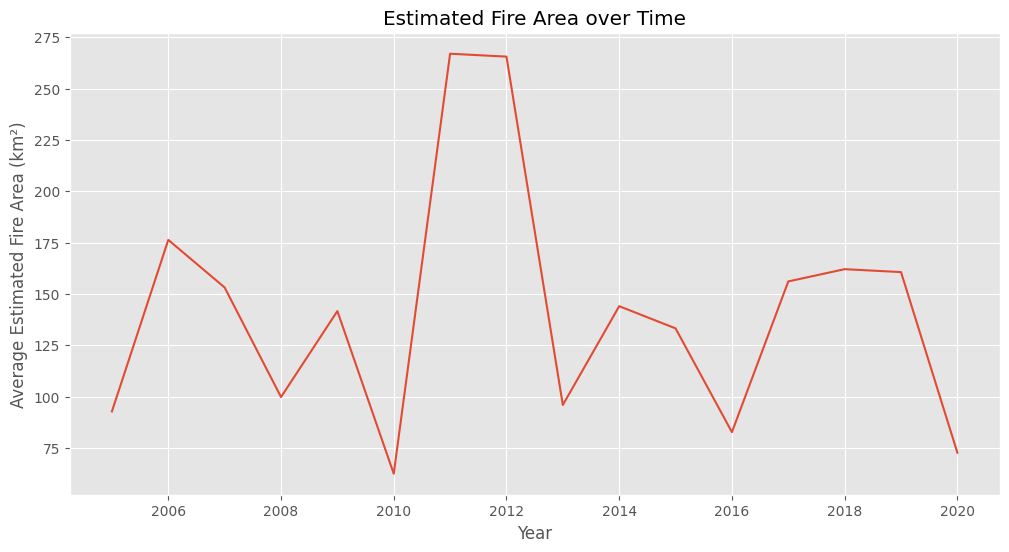

In [31]:
plt.figure(figsize=(12, 6))

df_new = df.groupby('Year')['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### We can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

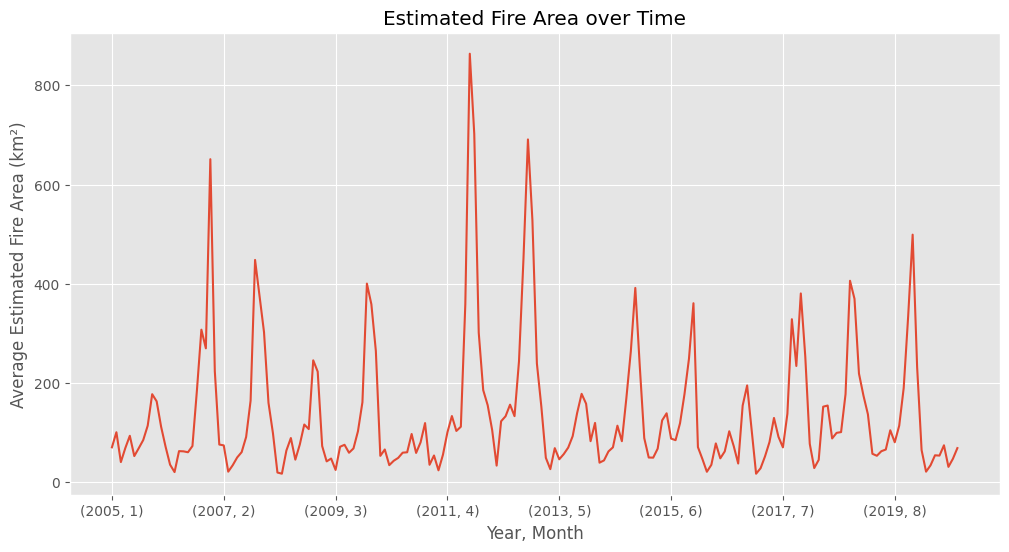

In [32]:
plt.figure(figsize=(12, 6))

df_new = df.groupby(['Year','Month'])['Estimated_fire_area'].mean()
# Plotting the data
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km²)')
plt.title('Estimated Fire Area over Time')
plt.show()

### Let's have an insight on the distribution of mean estimated fire brightness across the regions

In [33]:
df["Region"].value_counts()

Region
WA     5627
QL     5533
NT     5053
NSW    4623
VI     2176
SA     1990
TA     1404
Name: count, dtype: int64

<Axes: xlabel='Region'>

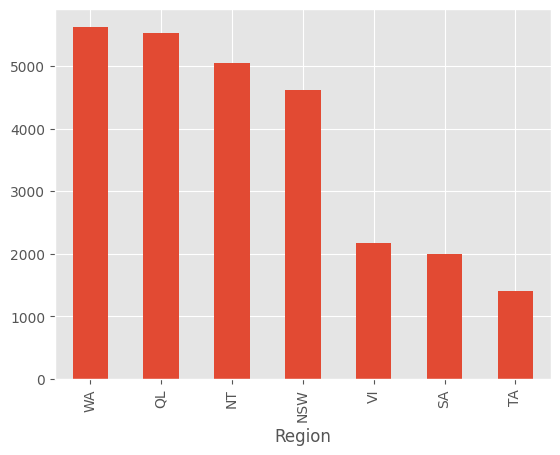

In [34]:
df["Region"].value_counts().plot(kind='bar')

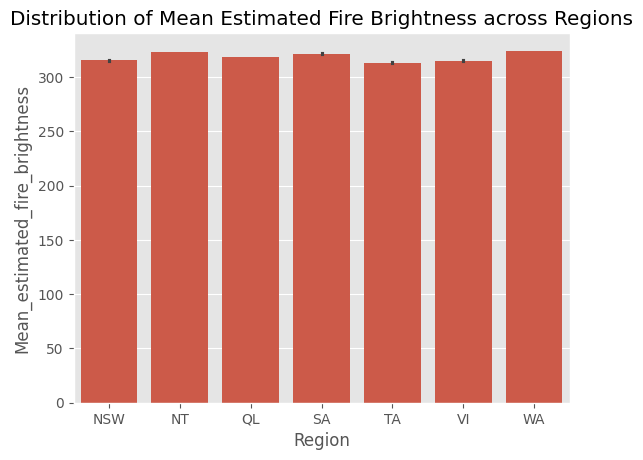

In [37]:
sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.title('Distribution of Mean Estimated Fire Brightness across Regions')
plt.show()

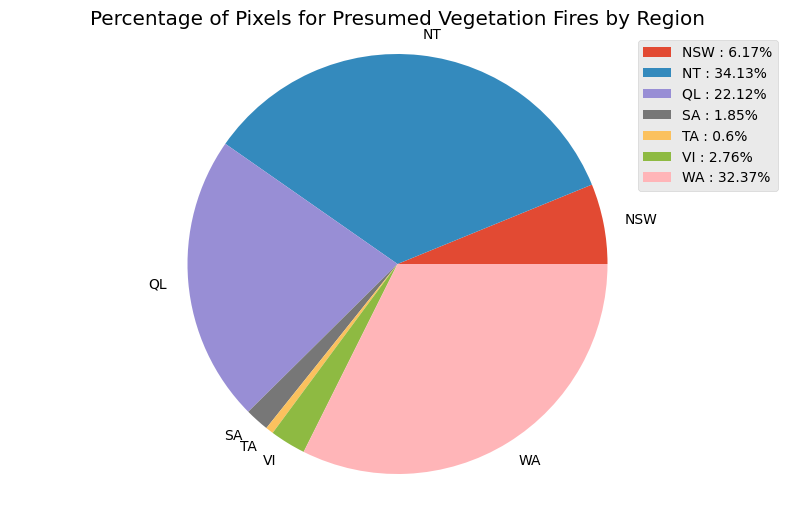

In [41]:

plt.figure(figsize=(10, 6))

region_counts = df.groupby('Region')['Count'].sum()

plt.pie(region_counts, labels=region_counts.index)
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.legend([f'{i} : {round(k/region_counts.sum()*100,2)}%'for i,k in zip(region_counts.index, region_counts)])
plt.show()

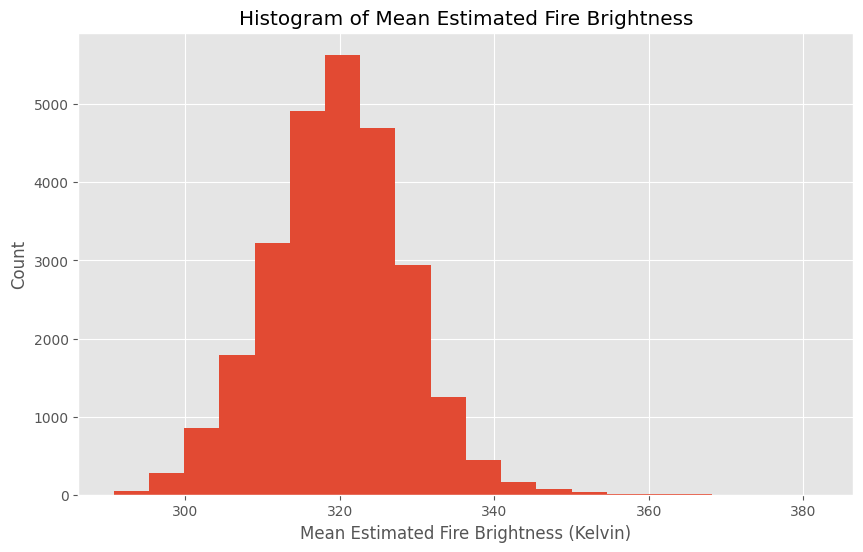

In [42]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))

plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

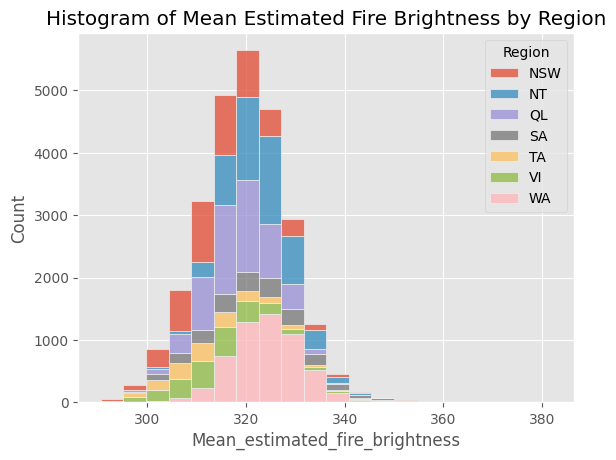

In [45]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', bins=20, hue='Region', multiple='stack')
plt.title('Histogram of Mean Estimated Fire Brightness by Region')
plt.show()

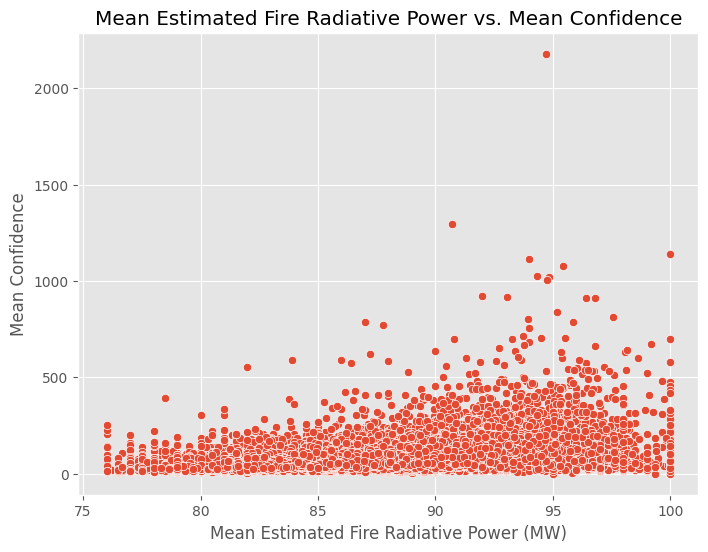

In [46]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

In [47]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [55]:
folium_map = folium.Map(location= [-25, 135], zoom_start=5)
for i in range(len(reg)):
    folium.Marker(location=[reg.iloc[i]['Lat'], reg.iloc[i]['Lon']], popup=reg.iloc[i]['region']).add_to(folium_map)
folium_map

In [57]:
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=5)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)